In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# *通过人口数预测利润*
# 读入数据

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=('population', 'profit'))
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 查看数据统计信息

In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# 绘制散点图

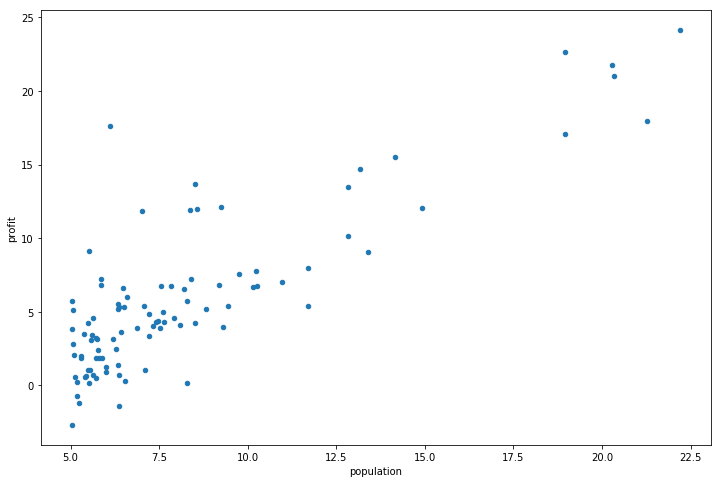

In [5]:
data.plot(kind='scatter', x='population', y='profit', figsize=(12, 8))

# 分离输入输出

In [6]:
rows = data.shape[0]
cols = data.shape[1]
X = np.mat(np.ones((rows, cols)))
X[:, 1:] = data.iloc[:, :cols - 1].values
X[:10, :]

matrix([[1.    , 6.1101],
        [1.    , 5.5277],
        [1.    , 8.5186],
        [1.    , 7.0032],
        [1.    , 5.8598],
        [1.    , 8.3829],
        [1.    , 7.4764],
        [1.    , 8.5781],
        [1.    , 6.4862],
        [1.    , 5.0546]])

In [7]:
Y = np.mat(data.iloc[:, 1].values).T
Y[:10, :]

matrix([[17.592 ],
        [ 9.1302],
        [13.662 ],
        [11.854 ],
        [ 6.8233],
        [11.886 ],
        [ 4.3483],
        [12.    ],
        [ 6.5987],
        [ 3.8166]])

In [8]:
theta = np.mat([0., 0.]).T
theta

matrix([[0.],
        [0.]])

# 损失函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [9]:
def cost_func(X, Y, theta, m):
    return np.sum(np.power(X * theta  - Y, 2)) / (2 * m)


# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [11]:
def batch_gradient_decent(X, Y, theta, m, alpha=0.01, num_of_iters=1000):
    #获取参数数量
    num_of_parameters = theta.shape[0]
    #保存损失函数值
    cost_list = [int(1e9 + 7)]
    #用于保存theta的临时向量
    theta_tmp = theta.copy()
    for i in range(num_of_iters):
        bias = X * theta - Y
        for j in range(num_of_parameters):
            theta_tmp[j, 0] = theta[j, 0] - (alpha / m) * np.sum(np.multiply(bias, X[:, j]))
        theta = theta_tmp
        cost_val = np.sum(np.power(bias, 2)) / (2 * m)
        cost_list.append(cost_val)
    cost_list.append(cost_func(X, Y, theta, rows))
    return theta, cost_list[1:]

In [12]:
theta, cost_values = batch_gradient_decent(X, Y, theta, rows)
theta

matrix([[-3.24140214],
        [ 1.1272942 ]])

## 迭代的轮数

In [13]:
len(cost_values)

1001

## 最终的损失函数值

In [14]:
cost_values[-1]

4.515955503078912

# 绘制拟合后的曲线

In [15]:
x = np.mat(np.linspace(np.min(X), np.max(X), 100)).T
x[:10]

matrix([[1.        ],
        [1.21417172],
        [1.42834343],
        [1.64251515],
        [1.85668687],
        [2.07085859],
        [2.2850303 ],
        [2.49920202],
        [2.71337374],
        [2.92754545]])

In [17]:
y = theta[0, 0] + np.multiply(x, theta[1, 0])
y[:10]

matrix([[-2.11410794],
        [-1.87267341],
        [-1.63123887],
        [-1.38980434],
        [-1.1483698 ],
        [-0.90693527],
        [-0.66550073],
        [-0.4240662 ],
        [-0.18263166],
        [ 0.05880287]])

Text(0.5, 1.0, 'predicted profit vs. population')

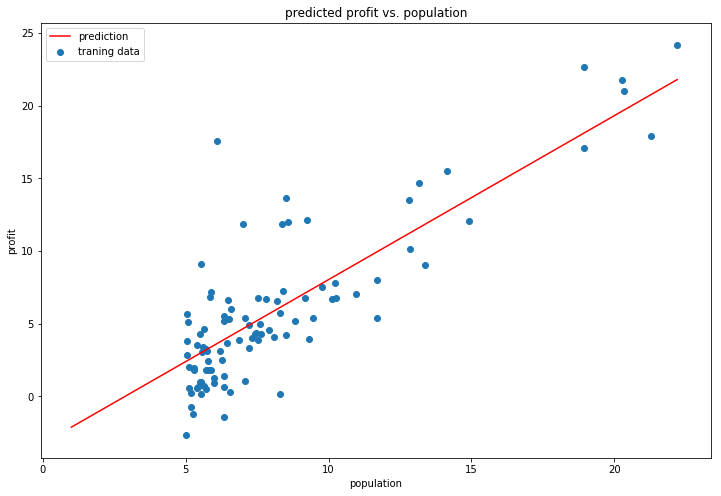

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'r', label='prediction')
ax.scatter(data.population, data.profit, label='traning data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('predicted profit vs. population')

# 绘制损失函数值图像

Text(0.5, 1.0, 'error vs. training epoch')

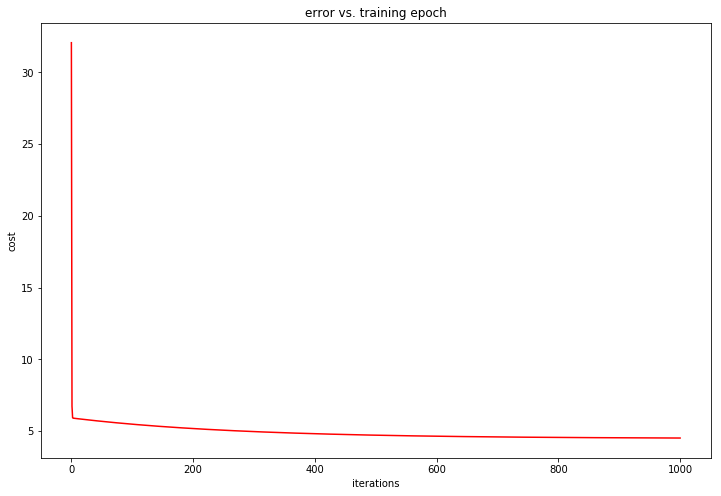

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(len(cost_values)), cost_values, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('error vs. training epoch')

# 使用scikit-learn的线性回归模型

In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')